# TITANIC
Crear un análisis del dataset para crear un modelo de predicción con esos datos.

In [1]:
import kagglehub
import pandas as pd
import os

/Users/rodrigobenitogarcia/anaconda3/envs/ml_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
kagglehub.__version__

'0.3.13'

In [3]:
# Download latest version
path = kagglehub.dataset_download("emanfatima2025/titanic-passenger-survival-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/rodrigobenitogarcia/.cache/kagglehub/datasets/emanfatima2025/titanic-passenger-survival-prediction-dataset/versions/1


In [15]:
# Load CSV
csv_file = os.path.join(path, "tested.csv")
titanic_df = pd.read_csv(csv_file)

In [5]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Exploración de datos

In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Limpieza y preparación de datos

### Eliminación de columnas irrelevantes

In [16]:
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

### Rellenar valores faltantes

In [20]:
titanic_clean_df = titanic_df.copy()
titanic_clean_df.fillna({
    'Age': titanic_clean_df['Age'].median(),
    'Fare': titanic_clean_df['Fare'].median(),
}, inplace=True)

In [21]:
titanic_clean_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Convertir variables categóricas a numéricas

In [23]:
titanic_clean_df['Sex'] = titanic_clean_df['Sex'].map({'male': 0, 'female': 1})

In [26]:
pd.get_dummies(titanic_clean_df, columns=['Embarked'], drop_first=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,34.5,0,0,7.8292,True,False
1,1,3,1,47.0,1,0,7.0000,False,True
2,0,2,0,62.0,0,0,9.6875,True,False
3,0,3,0,27.0,0,0,8.6625,False,True
4,1,3,1,22.0,1,1,12.2875,False,True
...,...,...,...,...,...,...,...,...,...
413,0,3,0,27.0,0,0,8.0500,False,True
414,1,1,1,39.0,0,0,108.9000,False,False
415,0,3,0,38.5,0,0,7.2500,False,True
416,0,3,0,27.0,0,0,8.0500,False,True


## Análisis exploratorio (EDA)

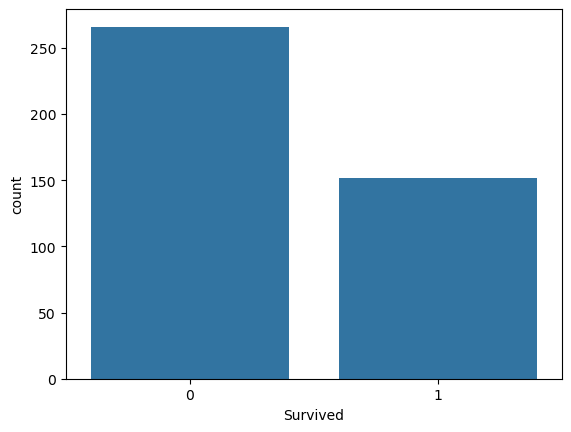

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=titanic_clean_df)
plt.show()

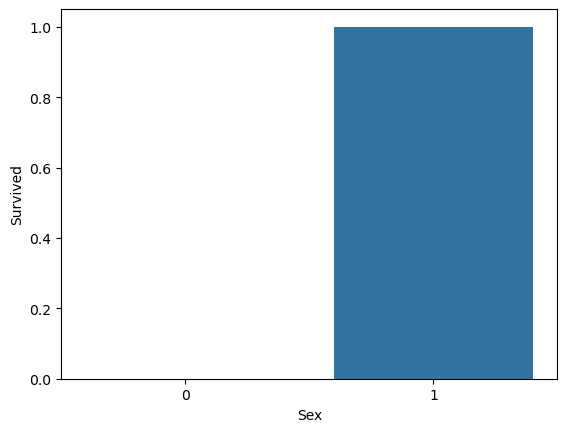

In [31]:
sns.barplot(x='Sex', y='Survived', data=titanic_clean_df)
plt.show()

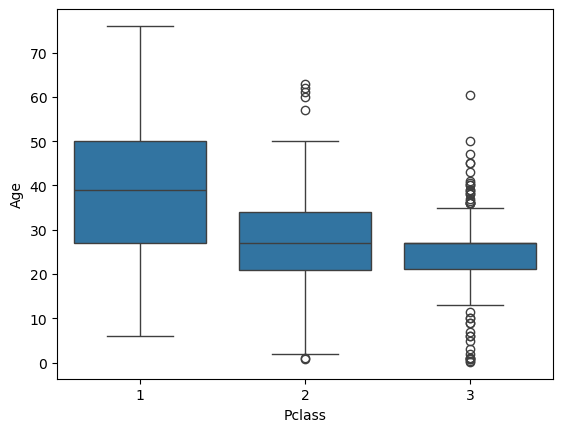

In [32]:
sns.boxplot(x='Pclass', y='Age', data=titanic_clean_df)
plt.show()